## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [6]:
scores = np.array(df['score'])
df.shape

(400, 1)

In [8]:
# 모평균, 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.002, 0.002, 0.002, 0.   , 0.002, 0.   , 0.   , 0.002, 0.002,
        0.003, 0.01 , 0.   , 0.017, 0.005, 0.013, 0.007, 0.015, 0.002,
        0.03 , 0.013, 0.03 , 0.008, 0.032, 0.01 , 0.038, 0.013, 0.032,
        0.027, 0.035, 0.012, 0.028, 0.017, 0.035, 0.017, 0.038, 0.017,
        0.025, 0.015, 0.015, 0.015, 0.012, 0.005, 0.022, 0.01 , 0.012,
        0.   , 0.012, 0.002, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
         27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37

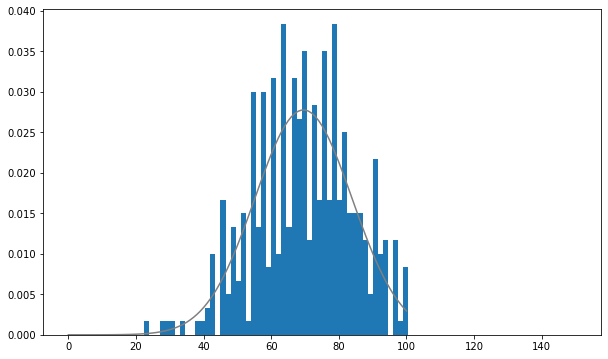

In [14]:
# 모집단이 정규분포를 이룬다고 가정하여 추정 수행

plt.figure(figsize = (10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

plt.plot(xs, rv.pdf(xs), color = 'gray')
plt.hist(scores, bins=100, range=(0,150), density = True)

In [15]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [18]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np. random.choice(scores, (n_samples,n))

array([[ 68,  75,  91, ...,  72,  57,  59],
       [ 97,  55,  61, ...,  65,  73,  71],
       [ 78,  67,  43, ...,  76,  62,  71],
       ...,
       [ 72,  87,  84, ...,  65,  59,  87],
       [ 54,  74,  69, ...,  69,  97,  72],
       [ 78,  57,  85, ...,  68, 100,  94]], dtype=int64)

## 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [22]:
df = pd.read_csv('ch4_scores400.csv')
print('모평균 : ', df.score.mean())
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np. random.choice(scores, (n_samples,n))

sample_mean = np.mean(samples, axis=1)

print('모분산 : ', df.score.var())

sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본평균, 분산 : ', np.mean(sample_mean), np.mean(sample_u_vars))

모평균 :  69.53
모분산 :  207.1870676691731
표본평균, 분산 :  69.53799999999998 206.67808263157895


In [26]:
# 표본평균의 평균

sample_mean = np.mean(samples, axis=1)
np.mean(sample_mean)

69.538

In [27]:
# 표본크기를 백만으로 할 때의 표본평균
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [28]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
s_mean

70.400

In [29]:
# 모분산
np.var(scores)

206.669

In [30]:
u_var = np.var(sample, ddof=1)
u_var

158.253

In [32]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean -rv.isf(0.975) * np.sqrt(p_var/n)

lcl,ucl

(64.100, 76.700)

In [33]:
enquete_df = pd.read_csv('ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [34]:
s_mean = enquete.mean()
s_mean

0.709

In [36]:
n_access_df = pd.read_csv('ch10_access.csv')
n_access_df
n_access = np.array(n_access_df['access number'])


#### 과제_0905_1
p266~p291 예제 코드를 풀어보세요.

#### 과제_0905_2
- 다음 용어를 예를 들어 설명하세요.
  불편성, 일치성, 불편분산<br>
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.

#### 시험범위 : p336까지